
# Utilizing NLP to Classify Political Subreddits (Democrats vs Republicans)
## Content List- Part 1

- [Problem Statement](#Problem-Statement)
- [Executive Summary](#Executive-Summary)
- [Data Collection](#Data-Collection)
- [Data Cleaning and EDA](#Data-Cleaning-and-EDA)

## Problem Statement

What patterns exist in online text that we can extract, analyze and use to refine online business models? I will be utilizing Natural Language Processing (NLP) to determine whether the author would be closer aligned to the Democratic or Conservative parties, by analyzing /r/Democrats and /r/Conservative on Reddit. 
The goal will be to build and test an assortment of classification models that can predict whether the author is more likely to hold conservative or liberal views, so that we can advise an online advertiser which ads to run for which audiences.


## Executive Summary

Part 1 of this project focuses on the data gathering, wrangling, cleaning and processing from "Natural Language" to something that computers can interpret and model, specifically numerical values. 

The source of our data is one of the current most popular websites for conversations, discussions and arguments on the internet, none other than www.Reddit.com. Home to over 26 Million monthly users, 850,000 subreddits and 18 billion monthly pageviews, Reddit is one of the premier locations on the internet for distribution, manipulation and consumption of data. What better way for us to test a model's ability to classify input into discrete classes than the hotbed of online discussion itself?

In our efforts to classify the text, we will be combining the text from the title as well as the body of the post in order to maximize our analytical process' capacity. This will provide a larger corpus for each post, which will result in a largely and hopefully more robust corpora to train our algorithm. In comparing the subreddits by the numbers, r/Democrats has less subscribers with 91k as compared to /r/Conservative’s 205k, but how do their word usages stack up?

We begin by utilizing the Reddit API to scrape the information from two politically themed subreddits: /r/Democrats and /r/Republicans. In total, we will attempt to pull 1000 posts per subreddit for a total of 2000, but understand that we may fall short due to duplicates or issues with the API's limits. 

After reading in the data, we ensure there are no duplicate posts, we utilize the Pandas library to convert all title and post text dictionaries into dataframes where the text and subreddit location are included, but the subreddit itself is binarized in order to make it feasible for our model to understand. 

Our dataset is then split up into train and test partitions before being fed into a series of models in order to determine the most apt model for our use. The vectorizers that we will employ in order to tokenize the words and additionally clean the text are: CountVectorizer as well as TF-IDF Vectorizer. Although similar to CountVectorizer, TF-IDF is being utilized due to the vectorizer's purpose in controlling the frequency of terms across documents and datasets alike, introducing penalties for reoccuring words. This will help us in our attempts to understand the online text that we have scraped.

For the model selection, we have many at our disposal but will be utilizing the following: LogisticRegression, MultinomialNaiveBayes, RandomForest and finally AdaBoost. These are models that are adept at classification problems in which we are seeking to understand if something is one of two possibilities, with success being measured in Accuracy.

Before getting to the modeling however, we will save the dataframe to a .csv file, in order to lower the potential for needing to rescrape the data and subsequently starting over on the analytical process. Part 2 of this Notebook will pick up from where the end of Part 1 leaves off, with importing the newly formed .csv files and proceeding as planned.

## Data Collection

#### Import libraries

In [1]:
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
import requests
import time
import numpy as np
import pandas as pd

In [2]:
# Define URL and username
url_democrats = "https://www.reddit.com/r/Democrats/.json" # change subreddit here
url_conservative = "https://www.reddit.com/r/Conservative/.json"
username = {"User-agent": 'omgitsjonnn'}      # header to prevent 429 error```

In [3]:
# Function to pull subreddit posts
def get_subreddit(url, n_pulls, headers):    

    # Create empty templates
    posts = []
    after = None
    duplicates = []
    # Create a loop that does max 25 requests per pull
    for pull_num in range(n_pulls):
        print("Pulling data attempted", pull_num+1,"time(s)")

        if after == None:
            new_url = url                 # base case
        else:
            new_url = url+"?after="+after # subsequent iterations

        res = requests.get(new_url, headers=headers)

        if res.status_code == 200:
            subreddit_json = res.json()                      # Pull JSON
            posts.extend(subreddit_json['data']['children']) # Get subreddit posts
            after = subreddit_json['data']['after']          # 'after' = ID of the last post in this iteration
        else:
            print("We've run into an error. The status code is:", res.status_code)
            break

        time.sleep(1)
        
    return(posts)


In [4]:
get_conservative = get_subreddit(url_conservative, n_pulls = 50, headers= username)

Pulling data attempted 1 time(s)
Pulling data attempted 2 time(s)
Pulling data attempted 3 time(s)
Pulling data attempted 4 time(s)
Pulling data attempted 5 time(s)
Pulling data attempted 6 time(s)
Pulling data attempted 7 time(s)
Pulling data attempted 8 time(s)
Pulling data attempted 9 time(s)
Pulling data attempted 10 time(s)
Pulling data attempted 11 time(s)
Pulling data attempted 12 time(s)
Pulling data attempted 13 time(s)
Pulling data attempted 14 time(s)
Pulling data attempted 15 time(s)
Pulling data attempted 16 time(s)
Pulling data attempted 17 time(s)
Pulling data attempted 18 time(s)
Pulling data attempted 19 time(s)
Pulling data attempted 20 time(s)
Pulling data attempted 21 time(s)
Pulling data attempted 22 time(s)
Pulling data attempted 23 time(s)
Pulling data attempted 24 time(s)
Pulling data attempted 25 time(s)
Pulling data attempted 26 time(s)
Pulling data attempted 27 time(s)
Pulling data attempted 28 time(s)
Pulling data attempted 29 time(s)
Pulling data attempted 

In [5]:
# Call function to get democrats data
get_democrats = get_subreddit(url_democrats, n_pulls = 50, headers = username)

Pulling data attempted 1 time(s)
Pulling data attempted 2 time(s)
Pulling data attempted 3 time(s)
Pulling data attempted 4 time(s)
Pulling data attempted 5 time(s)
Pulling data attempted 6 time(s)
Pulling data attempted 7 time(s)
Pulling data attempted 8 time(s)
Pulling data attempted 9 time(s)
Pulling data attempted 10 time(s)
Pulling data attempted 11 time(s)
Pulling data attempted 12 time(s)
Pulling data attempted 13 time(s)
Pulling data attempted 14 time(s)
Pulling data attempted 15 time(s)
Pulling data attempted 16 time(s)
Pulling data attempted 17 time(s)
Pulling data attempted 18 time(s)
Pulling data attempted 19 time(s)
Pulling data attempted 20 time(s)
Pulling data attempted 21 time(s)
Pulling data attempted 22 time(s)
Pulling data attempted 23 time(s)
Pulling data attempted 24 time(s)
Pulling data attempted 25 time(s)
Pulling data attempted 26 time(s)
Pulling data attempted 27 time(s)
Pulling data attempted 28 time(s)
Pulling data attempted 29 time(s)
Pulling data attempted 

In [12]:
# choosing what information we should be extracting for our analysis
get_democrats[1]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'democrats',
  'selftext': '',
  'author_fullname': 't2_nkk56',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': 'Trump blocks three Florida congresswomen from visiting Homestead child detention center',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/democrats',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': None,
  'downs': 0,
  'thumbnail_height': 78,
  'hide_score': False,
  'name': 't3_bagmbv',
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'ups': 526,
  'domain': 'miamiherald.com',
  'media_embed': {},
  'thumbnail_width': 140,
  'author_flair_template_id': None,
  'is_original_content': False,
  'user_reports': [],
  'secure_media': None,
  'is_reddit_media_domain': False,
  'is_meta': False,
  'category': None,
  'secure_media_embed': {},
  'link_flair_text': None,


In [13]:
#displaying the unique identifier that we will use to differentiate posts
get_conservative[1]['data']['name']

't3_baf5b7'

In [14]:
#build a function to automatically convert the data from post lists to df
def df_posts(post_list):
    post_titles = []
    dupes = []
    
    for i in range(len(post_list)):
        if post_list[i]['data']['name'] in dupes:
            pass
        else:
            title_dict = {}
            if type(post_list[i]['data']['selftext']) == str:
                title_dict['Post Text']= post_list[i]['data']['title'] + '\n' + post_list[i]['data']['selftext']
            
            else:
                title_dict['Post Text'] = post_list[i]['data']['title']
            title_dict['Subreddit'] = post_list[i]['data']['subreddit']
            title_dict['Length of Title'] = len(post_list[i]['data']['title'])
            title_dict['ID'] = post_list[i]['data']['name']
            post_titles.append(title_dict)
            dupes.append(post_list[i]['data']['name'])

    return pd.DataFrame(post_titles)

In [15]:
#convert the list of democrat posts to a dataframe
dem_df = df_posts(get_democrats)
dem_df.head()

,ID,Length of Title,Post Text,Subreddit
0,t3_bal6v7,214,William Barr’s stunt has backfired: Barr has s...,democrats
1,t3_bagmbv,87,Trump blocks three Florida congresswomen from ...,democrats
2,t3_balovh,241,The U.S. Is Tracking Migrant Girls' Periods to...,democrats
3,t3_bah81y,83,The majority of Americans tend to agree with D...,democrats
4,t3_bag1p5,68,Fourth person in six months dies in ICE immigr...,democrats


In [16]:
#convert the list of conservative posts to a dataframe
cons_df = df_posts(get_conservative)
cons_df.shape

(787, 4)

In [17]:
dem_df.head()

,ID,Length of Title,Post Text,Subreddit
0,t3_bal6v7,214,William Barr’s stunt has backfired: Barr has s...,democrats
1,t3_bagmbv,87,Trump blocks three Florida congresswomen from ...,democrats
2,t3_balovh,241,The U.S. Is Tracking Migrant Girls' Periods to...,democrats
3,t3_bah81y,83,The majority of Americans tend to agree with D...,democrats
4,t3_bag1p5,68,Fourth person in six months dies in ICE immigr...,democrats


In [18]:
cons_df.head()

,ID,Length of Title,Post Text,Subreddit
0,t3_bafvy6,293,In her own words... Antonia Okafor responds to...,Conservative
1,t3_baf5b7,54,Science shows that white liberals condescend t...,Conservative
2,t3_bah4s9,20,That's not racist...\n,Conservative
3,t3_bagod9,237,Sir Mick Jagger had a heart valve problem and ...,Conservative
4,t3_bah4s7,24,🎶My Heart Will Go Onnnn🎶\n,Conservative


In [19]:
#check length of Conservative posts dataframe
len(set(cons_df['ID']))

787

In [20]:
#check length of Democrats posts dataframe
len(set(dem_df['ID']))

991

## Data Cleaning and EDA

In [21]:
#concatenate each df into one master_df
master_df = pd.merge(cons_df, dem_df, how= 'outer')

In [22]:
len(master_df)

1778

In [23]:
#check for nulls
master_df.isnull().sum()

ID                 0
Length of Title    0
Post Text          0
Subreddit          0
dtype: int64

#### Binarizing Target Features: Democrats vs Conservative

In [24]:
#transforming the target into 1 for Democrats and 0 for Conservative
master_df['Subreddit'] = master_df['Subreddit'].map(lambda x : 1 if x == "democrats" else 0)

In [25]:
#verify that the mapping worked
master_df.tail()

,ID,Length of Title,Post Text,Subreddit
1773,t3_ayl6wn,83,Republicans manage to get Democrats out of a j...,1
1774,t3_aypii0,152,Trump’s TRAP; The new federal gag rule is desi...,1
1775,t3_aylnxe,106,Who voted 'no' on the resolution to condemn bi...,1
1776,t3_ays75x,163,Woman who co-founded spa where Kraft was cough...,1
1777,t3_ayx8h6,148,GOP congressman complains wearing a MAGA hat i...,1


In [26]:
# checking to see if any nulls on the Length of Title
master_df.sort_values('Length of Title').head(25)

,ID,Length of Title,Post Text,Subreddit
562,t3_b96ei1,3,😂😂😂\n,0
425,t3_b941ug,5,Think\n,0
369,t3_b9hly0,6,Oh No!\n,0
263,t3_b9lh7n,7,Period?\n,0
573,t3_b97ldf,7,Factual\n,0
766,t3_b8mqyi,8,Oh Biden\n,0
700,t3_b8py7h,11,Drink Milk?\n,0
775,t3_b8kvmb,12,APRIL FOOLS!\nThanks for participating. r/Con...,0
691,t3_b8l5bm,13,AOC Logic 2.0\n,0
776,t3_b8z8wh,13,Are you safe?\n,0


Here we can see quite clearly that there is a correlation between length of post text and class, as 24 out of 25 of the lowest length text are of the Conservative party. This may indicate a higher prevalence of meme usage and thus shorter posts.

In [27]:
### Export dataframe to use 
master_df.to_csv('./data/master_df.csv')

#### Top Frequencies for Subreddits

In [36]:
# import text based modules
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text, stop_words

In [37]:
additional_politics_english_stop = ['www', 'things', 'does', 'x200b', 'amp', 'want', 'watch',
                           'just', 'like', 'https', 'com', 'trump', 'republican', 'republicans',
                           'libertarians', 'democrats', 'democrat', 'people', 'libertarian',
                           'says', 'say', 'did', 'this', 'conservative', 'conservatives' ]

additional_english_stop = ['www', 'things', 'does', 'x200b', 'amp',
                           'just', 'like', 'https', 'com', 'watch', 'want',
                           'says', 'say', 'did', 'this']

new_stop_list = stop_words.ENGLISH_STOP_WORDS.union(additional_english_stop)
new_politics_english_stop_list = stop_words.ENGLISH_STOP_WORDS.union(additional_politics_english_stop)
print(len(stop_words.ENGLISH_STOP_WORDS))
print(len(additional_english_stop))
print(len(new_politics_english_stop_list))
print(len(new_stop_list))


318
15
342
332


In [38]:
# code originally written by boom
# Function to count words in each df
def word_counter(title_df,stop_list = []):
    
    # Count Vectorize
    cvec = CountVectorizer(stop_words = stop_list, max_features=15)

    # Transform the corpus
    X_text = cvec.fit_transform(title_df['Post Text'])

    # Converts text to array form
    X_text = pd.DataFrame(X_text.toarray(), columns= cvec.get_feature_names())

    # See word counts
    word_counts = X_text.sum().sort_values(0, ascending=False)
    
    return word_counts

In [39]:
# no Stop Words
word_counter(dem_df)
# we can see that there is still html jargon that needs to be cleaned further

the      979
to       740
trump    508
of       478
and      445
in       367
is       287
for      280
on       261
that     219
he       196
it       188
his      165
with     155
not      133
dtype: int64

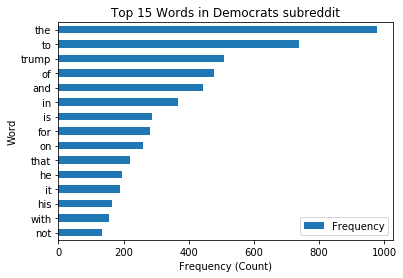

In [52]:
# Democrats Top 15 Words with no stop words
dems_wordcount = pd.DataFrame(word_counter(dem_df), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [40]:
# English Stop Words
word_counter(dem_df, stop_words.ENGLISH_STOP_WORDS)

trump          508
president       98
democrats       93
mueller         89
new             78
2020            78
report          74
house           71
just            69
white           68
people          68
twitter         65
says            64
republicans     62
donald          51
dtype: int64

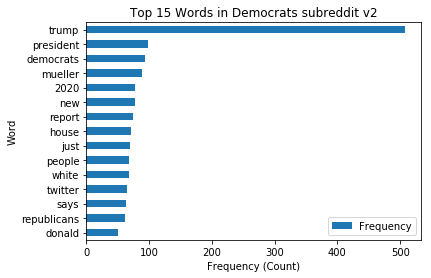

In [54]:
# Democrats Top 15 Words with default english stop words
dems_wordcount = pd.DataFrame(word_counter(dem_df, stop_words.ENGLISH_STOP_WORDS), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit v2")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [41]:
#displaying word list with new stop list
word_counter(dem_df,new_stop_list)


trump          508
president       98
democrats       93
mueller         89
new             78
2020            78
report          74
house           71
white           68
people          68
twitter         65
republicans     62
donald          51
democratic      50
time            49
dtype: int64

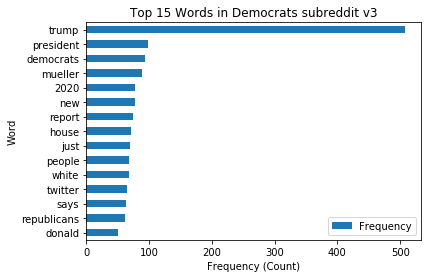

In [55]:
# Democrats Top 15 Words with custom stop words 
dems_wordcount = pd.DataFrame(word_counter(dem_df, stop_words.ENGLISH_STOP_WORDS), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit v3")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [42]:
#displaying word list with new political stop list 
word_counter(dem_df, new_politics_english_stop_list)

president         98
mueller           89
new               78
2020              78
report            74
house             71
white             68
twitter           65
donald            51
democratic        50
time              49
campaign          47
buttigieg         46
beto              41
administration    38
dtype: int64

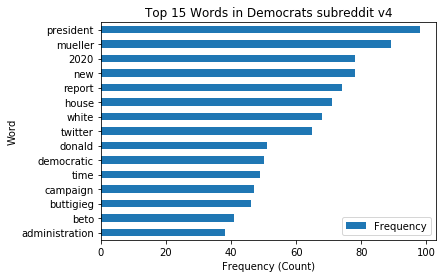

In [56]:
# Democrats Top 15 Words with custom political stop words
dems_wordcount = pd.DataFrame(word_counter(dem_df, new_politics_english_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit v4")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [43]:
#displaying word list with no stop list
word_counter(cons_df)
# we can see that there is still html jargon that needs to be cleaned further

the      457
to       409
of       295
in       207
and      207
for      177
is       139
that     135
it       121
on       109
trump    108
be        89
as        71
about     71
with      70
dtype: int64

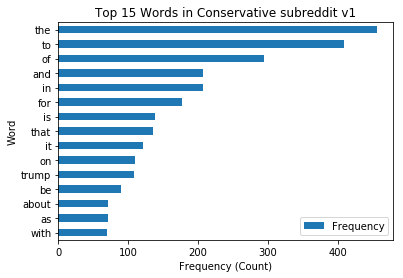

In [62]:
# Democrats Top 15 Words with custom political stop words
cons_wordcount = pd.DataFrame(word_counter(cons_df), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Conservative subreddit v1")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [44]:
#displaying word list with vanilla english stop list
word_counter(cons_df, stop_words.ENGLISH_STOP_WORDS)

trump           108
people           60
biden            53
new              48
white            44
state            38
like             35
conservative     35
democrats        33
mueller          32
watch            31
report           30
black            30
abortion         29
president        28
dtype: int64

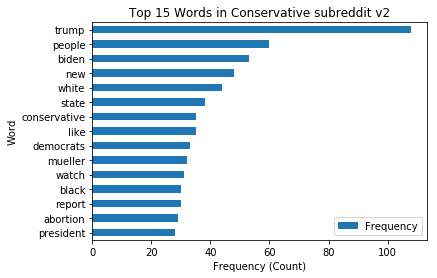

In [63]:
# Democrats Top 15 Words with standard english stop words
cons_wordcount = pd.DataFrame(word_counter(cons_df,stop_words.ENGLISH_STOP_WORDS), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Conservative subreddit v2")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [45]:
#displaying word list with new stop list
word_counter(cons_df, new_stop_list)

trump           108
people           60
biden            53
new              48
white            44
state            38
conservative     35
democrats        33
mueller          32
report           30
black            30
abortion         29
president        28
states           25
racist           25
dtype: int64

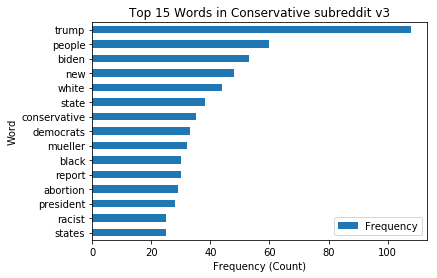

In [65]:
# Democrats Top 15 Words with custom english stop words
cons_wordcount = pd.DataFrame(word_counter(cons_df,new_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Conservative subreddit v3")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [46]:
#displaying word list with new politics stop list
word_counter(cons_df, new_politics_english_stop_list)

biden        53
new          48
white        44
state        38
mueller      32
report       30
black        30
abortion     29
president    28
states       25
racist       25
joe          22
left         21
america      21
2020         20
dtype: int64

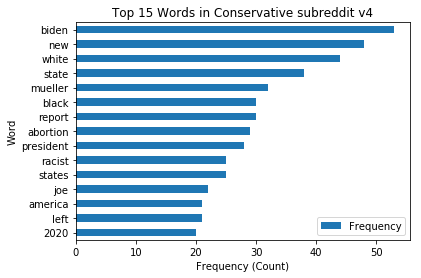

In [66]:
# Democrats Top 15 Words with custom politics stop words
cons_wordcount = pd.DataFrame(word_counter(cons_df,new_politics_english_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Conservative subreddit v4")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [47]:
master_df.head(35)

,ID,Length of Title,Post Text,Subreddit
0,t3_bafvy6,293,In her own words... Antonia Okafor responds to...,0
1,t3_baf5b7,54,Science shows that white liberals condescend t...,0
2,t3_bah4s9,20,That's not racist...\n,0
3,t3_bagod9,237,Sir Mick Jagger had a heart valve problem and ...,0
4,t3_bah4s7,24,🎶My Heart Will Go Onnnn🎶\n,0
5,t3_bamcol,69,FEC Records Indicate Hillary Campaign Illegall...,0
6,t3_bafral,81,Elderly Communist Is Worried About Authoritari...,0
7,t3_bag2pw,77,WATCH: Black Conservative Movement for America...,0
8,t3_badtnx,242,Kids Aren’t Born Trans — People who pursue a c...,0
9,t3_bakn6o,102,Mexican Trump Supporter Assaulted by Psychotic...,0


In [48]:
master_df.to_csv('./data/master_df.csv', index=False)

## Continue to Project 3 - Part 2
### Please exit notebook and open appropriately titled .ipynb file